In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

# 1

In [19]:
# Read our csv file and designate it as variable df
df = pd.read_csv('anime.csv')
# Check shape of our dataframe 
# 17562 rows and 35 columns
df.shape

(17562, 35)

In [20]:
df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [21]:
# Cheking information of our dataframe to see dtypes of all columns and the presence of zero values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [22]:
# We dropping columns that we will not use in the future analysis
df = df.drop(['English name','Japanese name','Aired','Licensors','Completed','On-Hold','Dropped','Plan to Watch','Score-10','Score-9','Score-8','Score-7','Score-6','Score-5','Score-4','Score-3','Score-2','Score-1','Ranked','Favorites'],axis= 1)

In [23]:
# Checking information to see that columns was deleted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MAL_ID      17562 non-null  int64 
 1   Name        17562 non-null  object
 2   Score       17562 non-null  object
 3   Genres      17562 non-null  object
 4   Type        17562 non-null  object
 5   Episodes    17562 non-null  object
 6   Premiered   17562 non-null  object
 7   Producers   17562 non-null  object
 8   Studios     17562 non-null  object
 9   Source      17562 non-null  object
 10  Duration    17562 non-null  object
 11  Rating      17562 non-null  object
 12  Popularity  17562 non-null  int64 
 13  Members     17562 non-null  int64 
 14  Watching    17562 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 2.0+ MB


In [24]:
#Checking our dataframe to by null values
null_columns = df.columns[df.isnull().any()] #denote the variable null columns, which will contain the name of the column with null values
df[null_columns].isnull().sum() # Check for null values in the column and their count
#Here we also made sure that our dataframe does not contain null values

Series([], dtype: float64)

# 2

•	Analysis with one categorical variable

In [25]:
# Looking at how many unique values the type column has 
df['Type'].unique()

array(['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music', 'Unknown'],
      dtype=object)

In [26]:
# Grouping by 'Type' column and count by 'MAL_ID',rename our 'MAL_ID' column by 'count'
# Double brackets, because we want to make it dataframe  
group_by_type = df.groupby('Type')[['MAL_ID']].agg('count').rename(columns = {'MAL_ID' : 'count'})
# Using reset_index() function, to make 'Type' like separate column
group_by_type = group_by_type.reset_index()
group_by_type

,Type,count
0,Movie,3041
1,Music,1469
2,ONA,1907
3,OVA,3894
4,Special,2218
5,TV,4996
6,Unknown,37


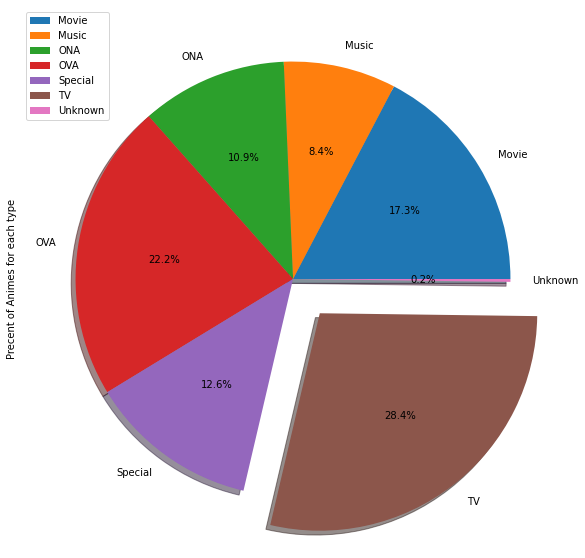

In [28]:
fig, ax = plt.subplots(figsize = (14, 10))
# I create an explode variable for a better example of my pie chart
explode = [0, 0, 0, 0, 0, 0.2, 0]
# autopct-to show precent
ax.pie(group_by_type['count'], autopct="%.1f%%",explode = explode,shadow = True, labels = group_by_type['Type'])
ax.set_ylabel('Precent of Animes for each type')
plt.legend()
plt.show()

•	Analysis with one numerical variable

In [31]:
# Using sort_values() function to sort our values by 'Member'
# Ascending False, because I want to take the highest values
# iloc[:20] to take first twenty rows
members = df.sort_values(by = 'Members', ascending = False).iloc[:20]
# sorting by index for a better example of my plot
members = members.sort_index()
members

,MAL_ID,Name,Score,Genres,Type,Episodes,Premiered,Producers,Studios,Source,Duration,Rating,Popularity,Members,Watching
10,20,Naruto,7.91,"Action, Adventure, Comedy, Super Power, Martia...",TV,220,Fall 2002,"TV Tokyo, Aniplex, Shueisha",Studio Pierrot,Manga,23 min. per ep.,PG-13 - Teens 13 or older,8,1830540,137167
1393,1535,Death Note,8.63,"Mystery, Police, Psychological, Supernatural, ...",TV,37,Fall 2006,"VAP, Konami, Ashi Production, Nippon Televisio...",Madhouse,Manga,23 min. per ep.,R - 17+ (violence & profanity),1,2589552,122401
1431,1575,Code Geass: Hangyaku no Lelouch,8.72,"Action, Military, Sci-Fi, Super Power, Drama, ...",TV,25,Fall 2006,"Bandai Visual, Mainichi Broadcasting System, B...",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),15,1583882,69924
1574,1735,Naruto: Shippuuden,8.16,"Action, Adventure, Comedy, Super Power, Martia...",TV,500,Winter 2007,"TV Tokyo, Aniplex, KSS, Rakuonsha, TV Tokyo Mu...",Studio Pierrot,Manga,23 min. per ep.,PG-13 - Teens 13 or older,18,1543765,362124
3564,4224,Toradora!,8.24,"Slice of Life, Comedy, Romance, School",TV,25,Fall 2008,"Genco, Starchild Records, Magic Capsule, Yomiu...",J.C.Staff,Light novel,24 min. per ep.,PG-13 - Teens 13 or older,17,1567792,72442
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",TV,64,Spring 2009,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,24 min. per ep.,R - 17+ (violence & profanity),3,2248456,171871
4636,6547,Angel Beats!,8.15,"Action, Comedy, Drama, School, Supernatural",TV,13,Spring 2010,"Aniplex, Dentsu, Mainichi Broadcasting System,...",P.A. Works,Original,24 min. per ep.,PG-13 - Teens 13 or older,15,1591773,55803
5683,9253,Steins;Gate,9.11,"Thriller, Sci-Fi",TV,24,Spring 2011,"Frontier Works, Media Factory, Movic, AT-X, Ka...",White Fox,Visual novel,24 min. per ep.,PG-13 - Teens 13 or older,9,1771162,114349
6295,10620,Mirai Nikki,7.54,"Action, Mystery, Psychological, Shounen, Super...",TV,26,Fall 2011,"Lantis, Kadokawa Shoten, Rakuonsha, Kadokawa P...",Asread,Manga,23 min. per ep.,R+ - Mild Nudity,19,1533289,66219
6474,11061,Hunter x Hunter (2011),9.1,"Action, Adventure, Fantasy, Shounen, Super Power",TV,148,Fall 2011,"VAP, Nippon Television Network, Shueisha",Madhouse,Manga,23 min. per ep.,PG-13 - Teens 13 or older,12,1673924,227277


<ipython-input-38-5259fc63b72f>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(members["Name"], rotation = 90)


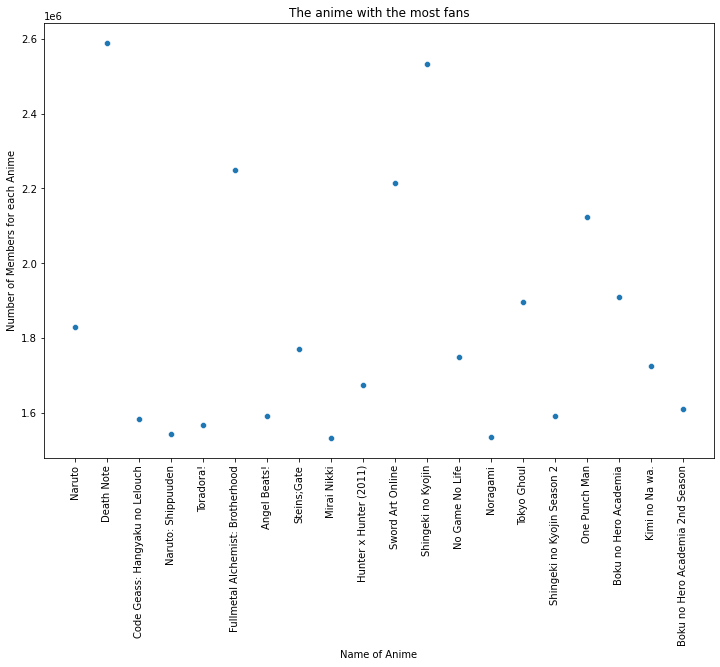

In [38]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.scatterplot(data=members, x="Name", y="Members")
ax.set_xlabel('Name of Anime')
ax.set_ylabel('Number of Members for each Anime')
ax.set_title('The anime with the most fans')
ax.set_xticklabels(members["Name"], rotation = 90)
plt.show()

•	Analysis with date/datetime values

In [92]:
date_count = df.Premiered.str.extract('(\d+)').rename(columns = {0 : 'Year'})
date_count['Year'] = pd.to_datetime(date_count['Year'])
date_count = date_count.groupby('Year')[['Year']].agg('count').rename(columns = {'Year' : 'count'})

In [93]:
date_count.groupby((date_count.index.year//10)*10).sum()

,count
Year,
1960,79
1970,209
1980,313
1990,469
2000,1245
2010,2098
2020,332


In [89]:
date_count = date_count.reset_index()

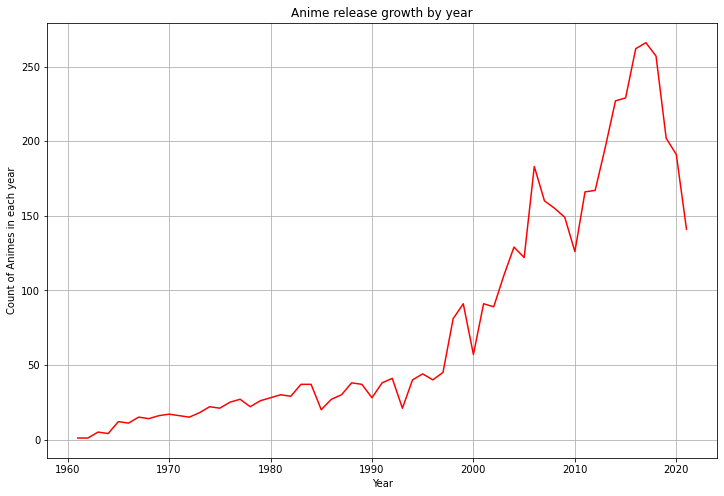

In [90]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(date_count['Year'], date_count['count'], linestyle='-', color = 'r')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Animes in each year')
ax.set_title('Anime release growth by year')
ax.grid(True)
plt.show()

•	Analysis with set of two variables

In [43]:
group_type_rating = df.groupby(['Type','Rating'])[['MAL_ID']].agg('count').rename(columns = {'MAL_ID' : 'count'})
group_type_rating = group_type_rating.reset_index()

In [57]:
group_type_rating

,Type,Rating,count
0,Movie,G - All Ages,1287
1,Movie,PG - Children,421
2,Movie,PG-13 - Teens 13 or older,796
3,Movie,R - 17+ (violence & profanity),201
4,Movie,R+ - Mild Nudity,143
5,Movie,Rx - Hentai,9
6,Movie,Unknown,184
7,Music,G - All Ages,1183
8,Music,PG - Children,51
9,Music,PG-13 - Teens 13 or older,199


Text(0.5, 1.0, 'Number of Animes by Type of each Rating')

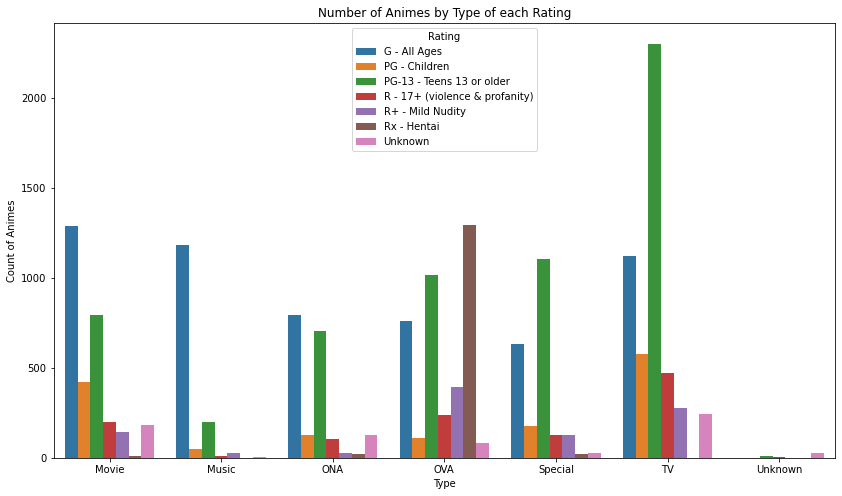

In [44]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.barplot(ax = ax, data = group_type_rating, x = 'Type', y = 'count', hue = 'Rating')
ax.set_xlabel('Type')
ax.set_ylabel('Count of Animes')
ax.set_title('Number of Animes by Type of each Rating')

•	Groupby and apply filtration on the data

In [51]:
total_count = df.groupby('Studios').filter(lambda x: x['MAL_ID'].count() > 100)
row_indexes = total_count[total_count['Studios'] == 'Unknown'].index
total_count.drop(row_indexes, inplace = True)
unique_studios = total_count['Studios'].unique()
print('Name of studios that have over 100 anime: ')
for index, values in enumerate(unique_studios):
    print('{}) {}'.format(index+1, values))

Name of studios that have over 100 anime: 
1) Sunrise
2) Bones
3) Madhouse
4) Toei Animation
5) J.C.Staff
6) Nippon Animation
7) Studio Pierrot
8) Gonzo
9) Studio Deen
10) OLM
11) Production I.G
12) AIC
13) Xebec
14) Kyoto Animation
15) TMS Entertainment
16) Shin-Ei Animation
17) Tatsunoko Production
18) Shaft
19) A-1 Pictures
20) DLE


In [52]:
total_count['Studios'].value_counts()

Toei Animation          755
Sunrise                 479
J.C.Staff               358
Madhouse                324
TMS Entertainment       277
Production I.G          266
Studio Deen             263
Studio Pierrot          249
OLM                     212
Nippon Animation        208
A-1 Pictures            193
DLE                     167
Shin-Ei Animation       166
Tatsunoko Production    141
Bones                   127
AIC                     122
Gonzo                   121
Shaft                   119
Kyoto Animation         115
Xebec                   114
Name: Studios, dtype: int64

•	My own features

In [58]:
group_by_studios = df.groupby('Studios')[['MAL_ID']].agg('count').rename(columns = {'MAL_ID' : 'count'})
group_by_studios = group_by_studios.sort_values(by='count',ascending = False).iloc[:16]
group_by_studios = group_by_studios.drop('Unknown')
group_by_studios

,count
Studios,
Toei Animation,755
Sunrise,479
J.C.Staff,358
Madhouse,324
TMS Entertainment,277
Production I.G,266
Studio Deen,263
Studio Pierrot,249
OLM,212


<ipython-input-59-788d8b63b0e8>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(group_by_studios.index,rotation = 90)


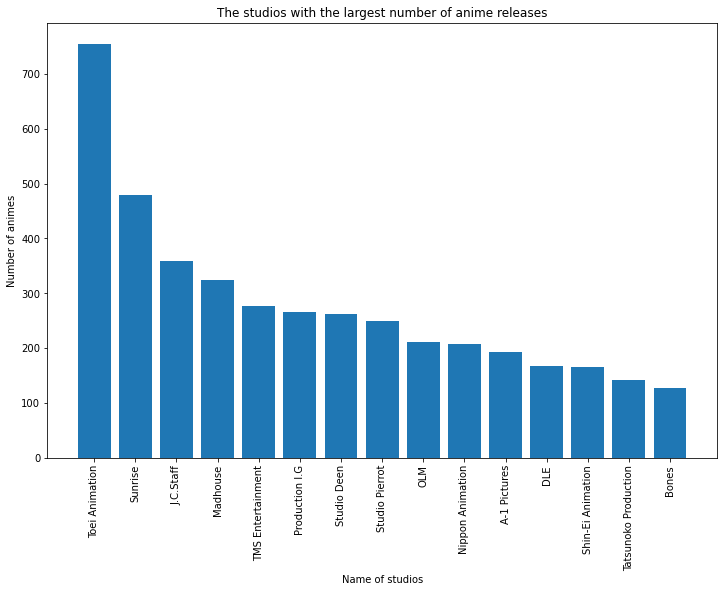

In [59]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.bar(group_by_studios.index, group_by_studios['count'])
ax.set_ylabel('Number of animes')
ax.set_xlabel('Name of studios')
ax.set_xticklabels(group_by_studios.index,rotation = 90)
ax.set_title('The studios with the largest number of anime releases')
plt.show()

In [55]:
name_popularity = df[['Name','Watching']].sort_values(by='Watching', ascending = False).iloc[:15]
name_popularity

,Name,Watching
11,One Piece,887333
15926,Shingeki no Kyojin: The Final Season,566239
16342,Jujutsu Kaisen (TV),533016
12493,Black Clover,530324
1574,Naruto: Shippuuden,362124
12492,Boruto: Naruto Next Generations,282596
15710,Yakusoku no Neverland 2nd Season,260775
17165,Horimiya,245814
16401,Dr. Stone: Stone Wars,229258
6474,Hunter x Hunter (2011),227277


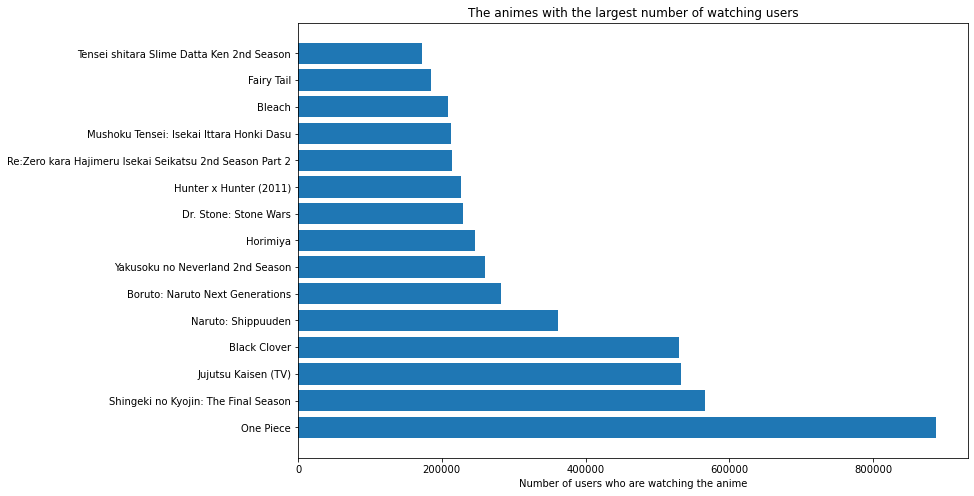

In [56]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.barh(name_popularity['Name'], name_popularity['Watching'])
ax.set_xlabel('Number of users who are watching the anime')
ax.set_title('The animes with the largest number of watching users')
plt.show()